In [5]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve,auc
from itertools import cycle
from scipy import interp
from sklearn.metrics import confusion_matrix,recall_score,classification_report
import datetime
import time
import warnings
warnings.filterwarnings("ignore")
import itertools
import pickle

In [6]:
def getWeight(input_array):
    col_sum = np.sum(input_array,axis=0)
    Med = np.median(col_sum)
    weight1 = -Med/col_sum
    weight2 = np.exp(np.array(weight1,dtype=np.float32))
    weight3 = 1/(1+weight2)
    return np.array(weight3,dtype=np.float64)

In [7]:
train = pd.read_csv('/Users/Amelia/Desktop/train.csv')
test = pd.read_csv('/Users/Amelia/Desktop/test.csv')
train_x_cols = train[train.columns[10:]]
train_y_cols = train[train.columns[0:10]]
test_x_cols = test[test.columns[10:]]
test_y_cols = test[test.columns[0:10]]
# 训练集
# tensorflow only accepts array
x_train_fullset = train_x_cols.values
y_train_fullset = train_y_cols.values
# 测试集
x_test = test_x_cols.values
y_test = test_y_cols.values
# 每个批次的大小,即每一次训练放入的样本个数
batch_size = 256
# 计算一共有多少个批次
n_batch = len(x_train_fullset) // batch_size
print(n_batch)
# 网络输入和输出placeholder
x = tf.placeholder(tf.float32, name='features')
y = tf.placeholder(tf.float32, shape=[None, 10], name='labels')

W1 = tf.Variable(tf.truncated_normal([340, 128], stddev=0.1))
b1 = tf.Variable(tf.zeros([128]))
layer1 = tf.nn.tanh(tf.matmul(x, W1) + b1)  # 隐层

W2 = tf.Variable(tf.truncated_normal([128, 10], stddev=0.1))
b2 = tf.Variable(tf.zeros([10]))
layer2 = tf.matmul(layer1, W2) + b2

predicted = tf.nn.softmax(layer2,name='output')

#find L2

weight_disease = getWeight(train_y_cols)
weight4label = tf.constant(weight_disease, dtype=tf.float32, name='weight4label')

4


In [8]:
loss = tf.reduce_mean(-weight4label * (y * tf.log(tf.clip_by_value(predicted, 1e-10, 1.0))+\
            (1-y)*tf.log(tf.clip_by_value(1-predicted, 1e-10, 1.0))))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [9]:
def hit3accu(y_pre,y_test):
    all_pre_list=[]
    for each in y_pre:
        top3_list=[]
        original_prob=each.tolist()
        top3=each[np.argpartition(each,-5)[-5:][::-1]]
        for i in top3:
            top3_list.append(original_prob.index(i))
        all_pre_list.append(top3_list)

    all_test_list=[]
    print(y_test)
    for each in y_test:
        each_list=[]
        freq = each.tolist().count(1)
        if freq==1:
            each_list.append(each.argmax())
        else:
            original_test=each.tolist()
            top2=each[np.argpartition(each,-freq)[-freq:]]
            for i in top2:
                each_list.append(original_test.index(i))
                original_test.remove(i)
        all_test_list.append(each_list)

    calcal=[]
    for each in range(len(all_pre_list)):
        intersection = [v for v in all_pre_list[each] if v in all_test_list[each]]
    #     print(intersection)
        calcal.append(len(intersection)>0)
    return(np.mean(calcal))

In [10]:
test_in_accu=pd.read_csv('test.csv')
X_test_final_accu=test_in_accu.iloc[:,10:]
y_test_accu=test_in_accu.iloc[:,0:10].values
test_in_accu

,d00015,d00049,d00749,d00091,d00088,d00797,d00438,d04283,d00867,d03827,...,tono_2.0,tbtest_0.0,tbtest_2.0,egd_0.0,egd_1.0,egd_2.0,sigcolon_0.0,sigcolon_1.0,sigcolon_2.0,normalAge
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1.952991
1,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,-0.856800
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,-0.435331
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,-0.622650
4,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,-0.856800
5,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,-0.856800
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0.969564
7,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,-0.856800
8,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,-0.716310
9,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0.875905


In [11]:
## 

init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

sess = tf.Session()  
sess.run(init_op)
now=time.time()
train_accu=[]
test_accu=[]
train_loss=[]
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
saver=tf.train.Saver()
# Start input enqueue threads.
for i in range(2000):
        #抽取数据batch
    data_random_index = [random.randint(0,len(x_train_fullset)-1) for m in range(batch_size)]
    x_batch = x_train_fullset[data_random_index]
    y_batch = y_train_fullset[data_random_index]
    #记录训练信息
    train_loss.append(sess.run(loss,feed_dict={x:x_batch,y:y_batch}))
    train_accu.append(hit3accu(sess.run(predicted,feed_dict={x:x_batch}),y_batch))
    test_accu.append(hit3accu(sess.run(predicted,feed_dict={x:x_test}),y_test))
    
    if i % 100 == 0:
        print('iter:%s,train_loss:%s,train_accu:%s,test_accu:%s'%\
              (i,train_loss[-1],train_accu[-1],test_accu[-1]))
    if i %500==0:
        model_path = "/Users/Amelia/Desktop/model{}.ckpt".format(i) 
        saver.save(sess,model_path)

duration=time.time()-now
print(duration)

[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
iter:0,train_loss:0.312971,train_accu:0.4140625,test_accu:0.418269230769
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ...

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
iter:100,train_loss:0.319757,train_accu:0.41015625,test_accu:0.418269230769
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 1 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
iter:200,train_loss:0.323125,train_accu:0.4453125,test_accu:0.418269230769
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 .

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 1 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
iter:300,train_loss:0.309088,train_accu:0.3984375,test_accu:0.418269230769
[[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 .

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 1 1 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
iter:400,train_loss:0.325605,train_accu:0.453125,test_accu:0.418269230769
[[1 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 1 ..

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 1 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 1 0]
 [1 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 1 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 ..., 
 [1 0 1 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 

[[0 0 1 ..., 1 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
iter:500,train_loss:0.318958,train_accu:0.42578125,test_accu:0.418269230769
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 1]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 1 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 1 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 [0 0 1 ..., 1 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 1]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 1]
 [0 0 1 ..., 1 0 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 1 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 1 0 0]
 [1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 1]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 1 ..., 1 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 1 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [1 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 1]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 1 0 0]
 [1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 1 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 1 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 1]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 1 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 1 0 1]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 1]
 [1 0 0 ..., 1 0 1]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 

[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 1 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 1 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 1 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 1 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 1 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 1 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 0 1 ..., 0 1 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 1]
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 1 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 1 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 1]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 1 ..., 0 0 1]
 [0 1 0 ..., 0 0 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[1 0 1 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 1 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [1 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 1 0 0]]
[[0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 

In [29]:
test_y_cols

,d00015,d00049,d00749,d00091,d00088,d00797,d00438,d04283,d00867,d03827
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,1
8,0,1,0,0,0,0,0,0,0,1
9,0,0,0,1,0,0,0,0,0,0


In [36]:
y_pre = sess.run(layer2,feed_dict={x:test_x_cols})

In [37]:
y_pre.shape

(1040, 10)

In [38]:
y_test.shape

(1040, 10)

In [39]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pre[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pre.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 10

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

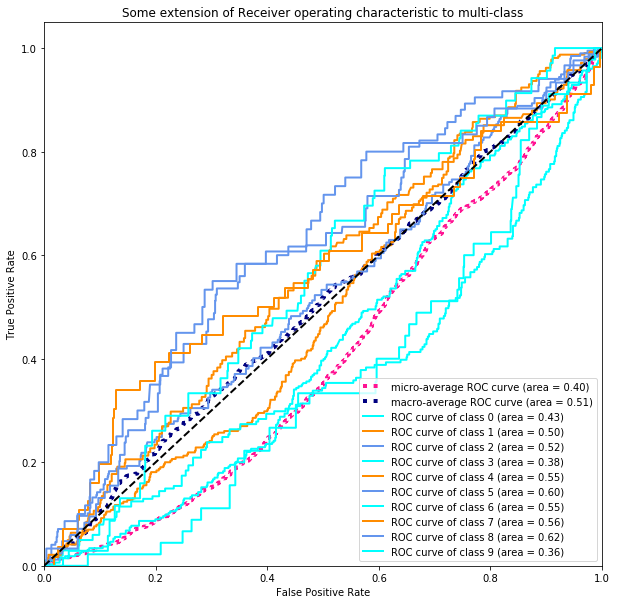

In [40]:
# Compute macro-average ROC curve and ROC area



# Plot all ROC curves
fig1=plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend()
plt.legend(loc="lower right")
plt.show()
fig1.savefig('roc.png')

In [41]:
all_accu=[]
for each in range(len(y_pre)):
    all_accu.append(y_pre[each].argmax()==y_test[each].argmax())
accu_1=(np.mean(all_accu))

In [42]:
all_pre_list=[]
for each in y_pre:
    top3_list=[]
    original_prob=each.tolist()
    top3=each[np.argpartition(each,-3)[-3:][::-1]]
    for i in top3:
        top3_list.append(original_prob.index(i))
    all_pre_list.append(top3_list)

In [44]:
all_test_list=[]
for each in y_test:
    each_list=[]
    
    if each.tolist().count(1)==1:
        each_list.append(each.argmax())
    else:
        original_test=each.tolist()
        top2=each[np.argpartition(each,-2)[-2:]]
        for i in top2:
            each_list.append(original_test.index(i))
            original_test.remove(i)
    all_test_list.append(each_list)

In [45]:
calcal=[]
for each in range(len(all_pre_list)):
    intersection = [v for v in all_pre_list[each] if v in all_test_list[each]]
#     print(intersection)
    calcal.append(len(intersection)>0)
accu_3=(np.mean(calcal))

In [46]:
all_pre_list_five=[]
for each in y_pre:
    top5_list=[]
    original_prob_five=each.tolist()
    top5=each[np.argpartition(each,-5)[-5:][::-1]]
    for i in top5:
        top5_list.append(original_prob_five.index(i))
    all_pre_list_five.append(top5_list)

In [47]:
calcal_five=[]
for each in range(len(all_pre_list_five)):
    intersection = [v for v in all_pre_list_five[each] if v in all_test_list[each]]
#     print(intersection)
    calcal_five.append(len(intersection)>0)
accu_5=(np.mean(calcal_five))

In [49]:
count=[]
for each in y_pre:
    count.append(each.argmax())  #统计每个样本的预测分类

test_y=[] #用于计算每类的accuracy
for each in y_test:
    test_y.append(each.argmax())#y_test真实值


In [50]:
deep_each=[]#存储每类的accuracy
def each_prob_deep(df,n):#该函数用于计算每类的accuracy
    df1=df.loc[df['y_test']==n]
    return np.mean(df1['y_test']==df1['deep_pre'])
df_each=pd.DataFrame({'y_test':test_y,'deep_pre':count})
for each in range(10):
    p=each_prob_deep(df_each,each)
    deep_each.append(p)     #deep预测结果

In [51]:
f1_score=(classification_report(test_y,count)) #输出f1score
#注意如果是multilabel,test_y应保留multilabel,即每行对应多个1

In [52]:
print(f1_score)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       323
          1       0.00      0.00      0.00       190
          2       0.50      0.01      0.01       154
          3       0.00      0.00      0.00       144
          4       0.10      0.03      0.05        91
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        31
          7       0.02      0.45      0.04        22
          8       0.00      0.00      0.00        22
          9       0.02      0.42      0.04        26

avg / total       0.08      0.02      0.01      1040



In [64]:
lines = f1_score.split('\n')
print(lines[4])

          2       0.50      0.01      0.01       154


In [60]:
# #用于存储每类的precision,recall,f1-score,support
# class_num=[]
# precision=[]
# recall=[]
# f1_score_=[]
# support=[]
# lines = f1_score.split('\n')

# for each in range(2,35):
#     line=lines[each].split()
#     #class_num.append(line[0])
#     precision.append(line[1])
#     recall.append(line[2])
#     f1_score_.append(line[3])
#     support.append(line[4])
# #     print(line)

IndexError: list index out of range

In [66]:
labels=range(10)##label现在有问题
# value_counts=X_test_final['diag1'].value_counts()
# # print(len(value_counts))
# for each in range(len(value_counts)):
#     labels.append((value_counts.index[each]))#labels的顺序和frequency保持一致

In [67]:
each_auc=[]#存储每类的auc
for each in labels:
    index=labels.index(each)
    each_auc.append(roc_auc[index])

In [68]:
#输出并绘制混淆矩阵
def plot_confusion_matrix(y_true,y_predicted,title='Confudion Matrix',cmap=plt.cm.Blues):
    plt.imshow(y_true, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(y_predicted))
    plt.xticks(tick_marks, y_predicted, rotation=0)
    plt.yticks(tick_marks, y_predicted)

    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(y_true.shape[0]), range(y_true.shape[1])):
        plt.text(j, i, y_true[i, j],
                 horizontalalignment="center",
                 color="white" if y_true[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

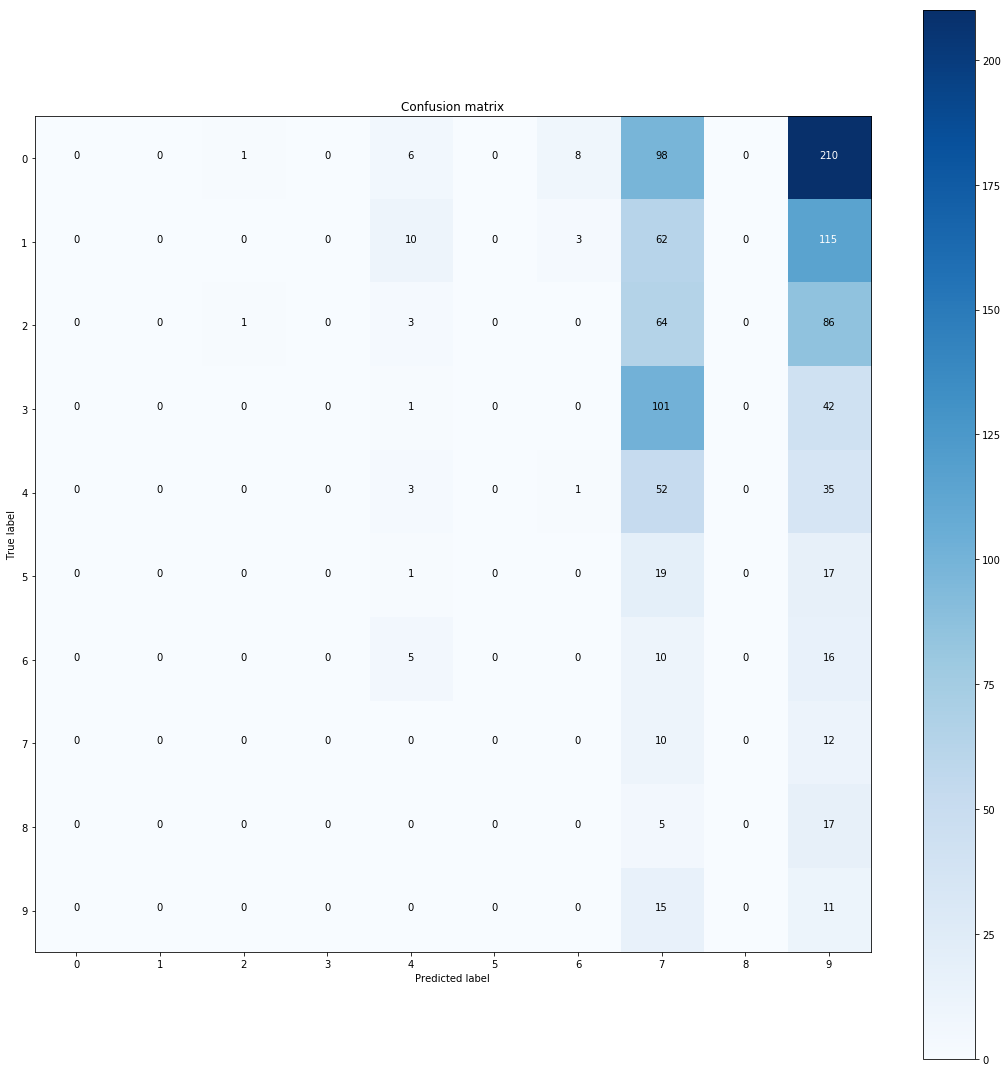

In [70]:
# plt.figure(figsize=10)
#计算混淆矩阵
cnf=confusion_matrix(test_y,count)
np.set_printoptions(precision=2)
# print("Recall metric in the testing dataset: ", cnf[1,1]/(cnf[1,0]+cnf[1,1]))  #计算召回率

# Plot non-normalized confusion matrix
class_names = list(range(10))
fig=plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf,y_predicted=class_names,title='Confusion matrix')
plt.show()
fig.savefig('matrix.png')

In [71]:
nowTime=datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
df_test=pd.DataFrame()
df_test1=pd.DataFrame()
df_test2=pd.DataFrame()
df_test3=pd.DataFrame()
df_test4=pd.DataFrame()
df_test5=pd.DataFrame()
df_test6=pd.DataFrame()
df_test['Disease']=labels#疾病的名称
df_test2['each_accuracy']=deep_each#每类的accuracy
df_test1['precision']=precision#每类的precision
df_test1['recall']=recall#每类的recall
df_test1['f1_score']=f1_score_#每类的f1-score
df_test1['support']=support#每类的support
df_test['each_auc']=each_auc#每类的auc
df_test3['step_loss']=train_loss#384
df_test3['train_accu']=train_accu#385
df_test4['test_accu']=test_accu#385
df_test5['micro_auc']=[(roc_auc['micro'])]
df_test5['macro_auc']=[(roc_auc['macro'])]
df_test6['precision']=[lines[-2].split()[-4]]
df_test6['recall']=[lines[-2].split()[-3]]
df_test6['f1-score']=[lines[-2].split()[-2]]
df_test6['accu@1']=[accu_1]
df_test6['accu@3']=[accu_3]
df_test6['accu@5']=[accu_5]
writer=pd.ExcelWriter('report_out_'+nowTime+".xlsx",engine='xlsxwriter')
df_out=pd.concat([df_test,df_test1,df_test2,df_test5,df_test6],axis=1)
df_out_all=pd.concat([df_test3,df_test4],axis=1)
# df_out.to_excel('report_out_'+nowTime+".xlsx",index=False,sheet_name='each')
# df_out_all.to_excel('report_out_'+nowTime+'.xlsx',index=False,sheet_name='all')
df_out.to_excel(writer,'each',index=False)
df_out_all.to_excel(writer,'all',index=False)
sheet=writer.book.add_worksheet('matrix')
sheet.insert_image(0,0,'matrix.png')
sheet1=writer.book.add_worksheet('ROC')
sheet1.insert_image(0,0,'roc.png')
writer.save()

In [73]:
# # 保存二进制模型  
# output_graph_def = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, \
#                                                                 output_node_names=['input','output'])  
# with tf.gfile.FastGFile('E:\\pingan\\model\\dataset_filter\\thirty_five\\co-occurence-single\\test.pb', mode='wb') as f:  
#     f.write(output_graph_def.SerializeToString())  